# Presentación de los Resultados


In [2]:
import os
from skimage import io
import numpy as np
import pandas as pd
import helper as hp

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

print(__version__)

3.0.2


## PRUEBAS

In [3]:
ZOOMS = ["13_SIMPLE","13_COMPOUND","14_SIMPLE","14_COMPOUND","15_SIMPLE","15_COMPOUND"]

In [13]:
PATH_PRUEBAS = "./Resultados"
pruebas = pd.read_csv(PATH_PRUEBAS+"/pruebas.csv")
prueba

,PRUEBA,RED,EPOCH,BATCH_SIZE
0,1,FC-DenseNet56,50,1
1,2,FC-DenseNet56,70,1
2,3,Encoder-Decoder,70,1
3,4,Encoder-Decoder,70,2
4,5,Encoder-Decoder-Skip,70,1
5,6,Encoder-Decoder-Skip,70,2
6,7,FRRN-A,70,1
7,8,MobileUNet,70,1
8,9,MobileUNet,70,2
9,10,MobileUNet-Skip,70,1


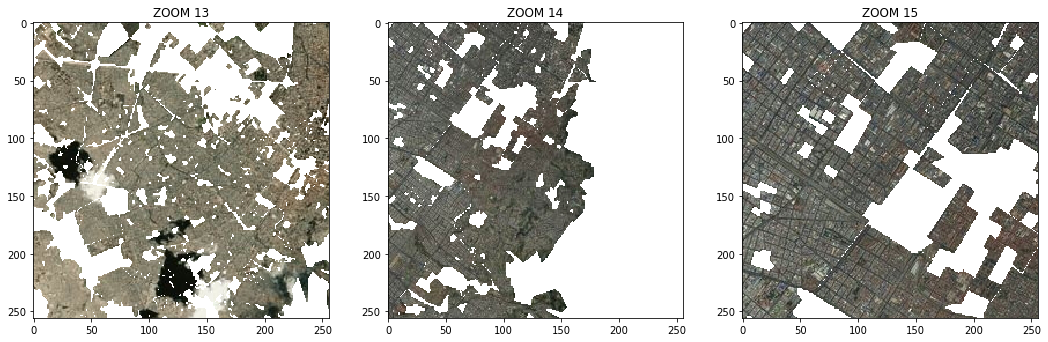

In [5]:
PATH_DATASET = "./data/dataset/OVERLAECOBO/WITHOUT BACKGROUND/OVERLAECOBO_#"

# import image
img_13_simple = io.imread(PATH_DATASET.replace("#","13")+"/SIMPLE/val/0.png")
img_14_simple = io.imread(PATH_DATASET.replace("#","14")+"/SIMPLE/val/12.png")
img_15_simple = io.imread(PATH_DATASET.replace("#","15")+"/SIMPLE/val/33.png")

hp.show_images([img_13_simple,img_14_simple,img_15_simple],titles=["ZOOM 13", "ZOOM 14", "ZOOM 15"])

## METRICA

Se uso la metrica [IoU](https://www.pyimagesearch.com/2016/11/07/intersection-over-union-iou-for-object-detection/) para calcular la similitud entre las imagenes de `Ground Truht` y `prediction`. A grandes Rasgos IoU funciona de la siguiente manera.
![iou](./Libro UIS/plantilla_latex/img/iou.png)

In [6]:
iou_all_test = pd.read_csv(PATH_PRUEBAS+"/Iou results.csv")
iou_all_test.head()

,PRUEBA,ZOOM,MODEL,BATCH_SIZE,EPOCH,MEAN_IOU,RUN_TIME
0,1,13_SIMPLE,FC-DenseNet56,1,50,0.236820,1704
1,2,13_SIMPLE,FC-DenseNet56,1,70,0.278959,1868
2,3,13_SIMPLE,Encoder-Decoder,1,70,0.115989,1919
3,4,13_SIMPLE,Encoder-Decoder,2,70,0.134592,1708
4,5,13_SIMPLE,Encoder-Decoder-Skip,1,70,0.276193,2489


## ¿Hay mejora en el IoU al hacer cambios de Resolucion?


In [7]:
le = [str(i[0])+"\nBATCH_SIZE: "+str(i[1])+"\nEPOCH: "+str(i[2]) for i in iou_all_test.loc[:,["MODEL", "BATCH_SIZE","EPOCH"]].values]

In [8]:
group_13_simple = go.Bar(
    x = le,
    y = iou_all_test[iou_all_test["ZOOM"] == "13_SIMPLE"]["MEAN_IOU"].values.tolist(),
    name = "13_SIMPLE",
    marker = dict( color = "rgb(49,130,189)")
)

group_13_compound = go.Bar(
    x = le,
    y = iou_all_test[iou_all_test["ZOOM"] == "13_COMPOUND"]["MEAN_IOU"].values.tolist(),
    name = "13_COMPOUND",
    marker = dict( color = "rgb(239,83,80)")
)

group_14_simple = go.Bar(
    x = le,
    y = iou_all_test[iou_all_test["ZOOM"] == "14_SIMPLE"]["MEAN_IOU"].values.tolist(),
    name = "14_SIMPLE",
    marker = dict( color = "rgb(253,216,53)")
)

group_14_compound = go.Bar(
    x = le,
    y = iou_all_test[iou_all_test["ZOOM"] == "14_COMPOUND"]["MEAN_IOU"].values.tolist(),
    name = "14_COMPOUND",
    marker = dict( color = "rgb(102,187,106)")
)

group_15_simple = go.Bar(
    x = le,
    y = iou_all_test[iou_all_test["ZOOM"] == "15_SIMPLE"]["MEAN_IOU"].values.tolist(),
    name = "15_SIMPLE",
    marker = dict( color = "rgb(79,195,247)")
)

group_15_compound = go.Bar(
    x = le,
    y = iou_all_test[iou_all_test["ZOOM"] == "15_COMPOUND"]["MEAN_IOU"].values.tolist(),
    name = "15_COMPOUND",
    marker = dict( color = "rgb(126,87,194)")
)


data = [group_13_simple, group_13_compound,group_14_simple,group_14_compound, group_15_simple, group_15_compound ]
layout = go.Layout(
    xaxis=dict(tickangle=45),
    yaxis = dict(title = "IOU"),
    barmode='group',
    legend=dict( orientation="h", x = 0, y = 1.2)
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='angled-text-bar')

In [9]:
def grafica_bar(PRUEBA):
    
    aux = pruebas[pruebas["PRUEBA"] == PRUEBA]
    table = iou_all_test[iou_all_test["MODEL"] == aux.values[0][1]][iou_all_test[iou_all_test["MODEL"] == aux.values[0][1]]["PRUEBA"] == PRUEBA]

    means = table["MEAN_IOU"].values.tolist()

    
    group_13_simple = go.Bar(
        #x = ZOOMS,
        y = np.array(means[0]),
        name = "13_SIMPLE",
        marker = dict( color = "rgb(49,130,189)")
    )

    group_13_compound = go.Bar(
        #x = ZOOMS,
        y = np.array(means[1]),
        name = "13_COMPOUND",
        marker = dict( color = "rgb(239,83,80)")
    )

    group_14_simple = go.Bar(
        #x = ZOOMS,
        y = np.array(means[2]),
        name = "14_SIMPLE",
        marker = dict( color = "rgb(253,216,53)")
    )

    group_14_compound = go.Bar(
        #x = ZOOMS,
        y = np.array(means[3]),
        name = "14_COMPOUND",
        marker = dict( color = "rgb(102,187,106)")
    )

    group_15_simple = go.Bar(
      #  x = ZOOMS,
        y = np.array(means[4]),
        name = "15_SIMPLE",
        marker = dict( color = "rgb(79,195,247)")
    )

    group_15_compound = go.Bar(
       # x = ZOOMS,
        y = np.array(means[5]),
        name = "15_COMPOUND",
        marker = dict( color = "rgb(126,87,194)")
    )


    data = [group_13_simple, group_13_compound,group_14_simple,group_14_compound, group_15_simple, group_15_compound ]
    layout = go.Layout(
        xaxis=dict(tickangle=0, title = le[PRUEBA]),
        yaxis = dict(title = "IOU"),
        barmode='group',
    )

    fig = go.Figure(data=data, layout=layout)
    iplot(fig, filename='angled-text-bar')

In [10]:
PRUEBA = 10
grafica_bar(PRUEBA)

Como se puede observar en la grafica si hay cambio al hacer, y en algunos casos hay mejoria en el uso de `COMPOUND` en comparacion son `SIMPLE`

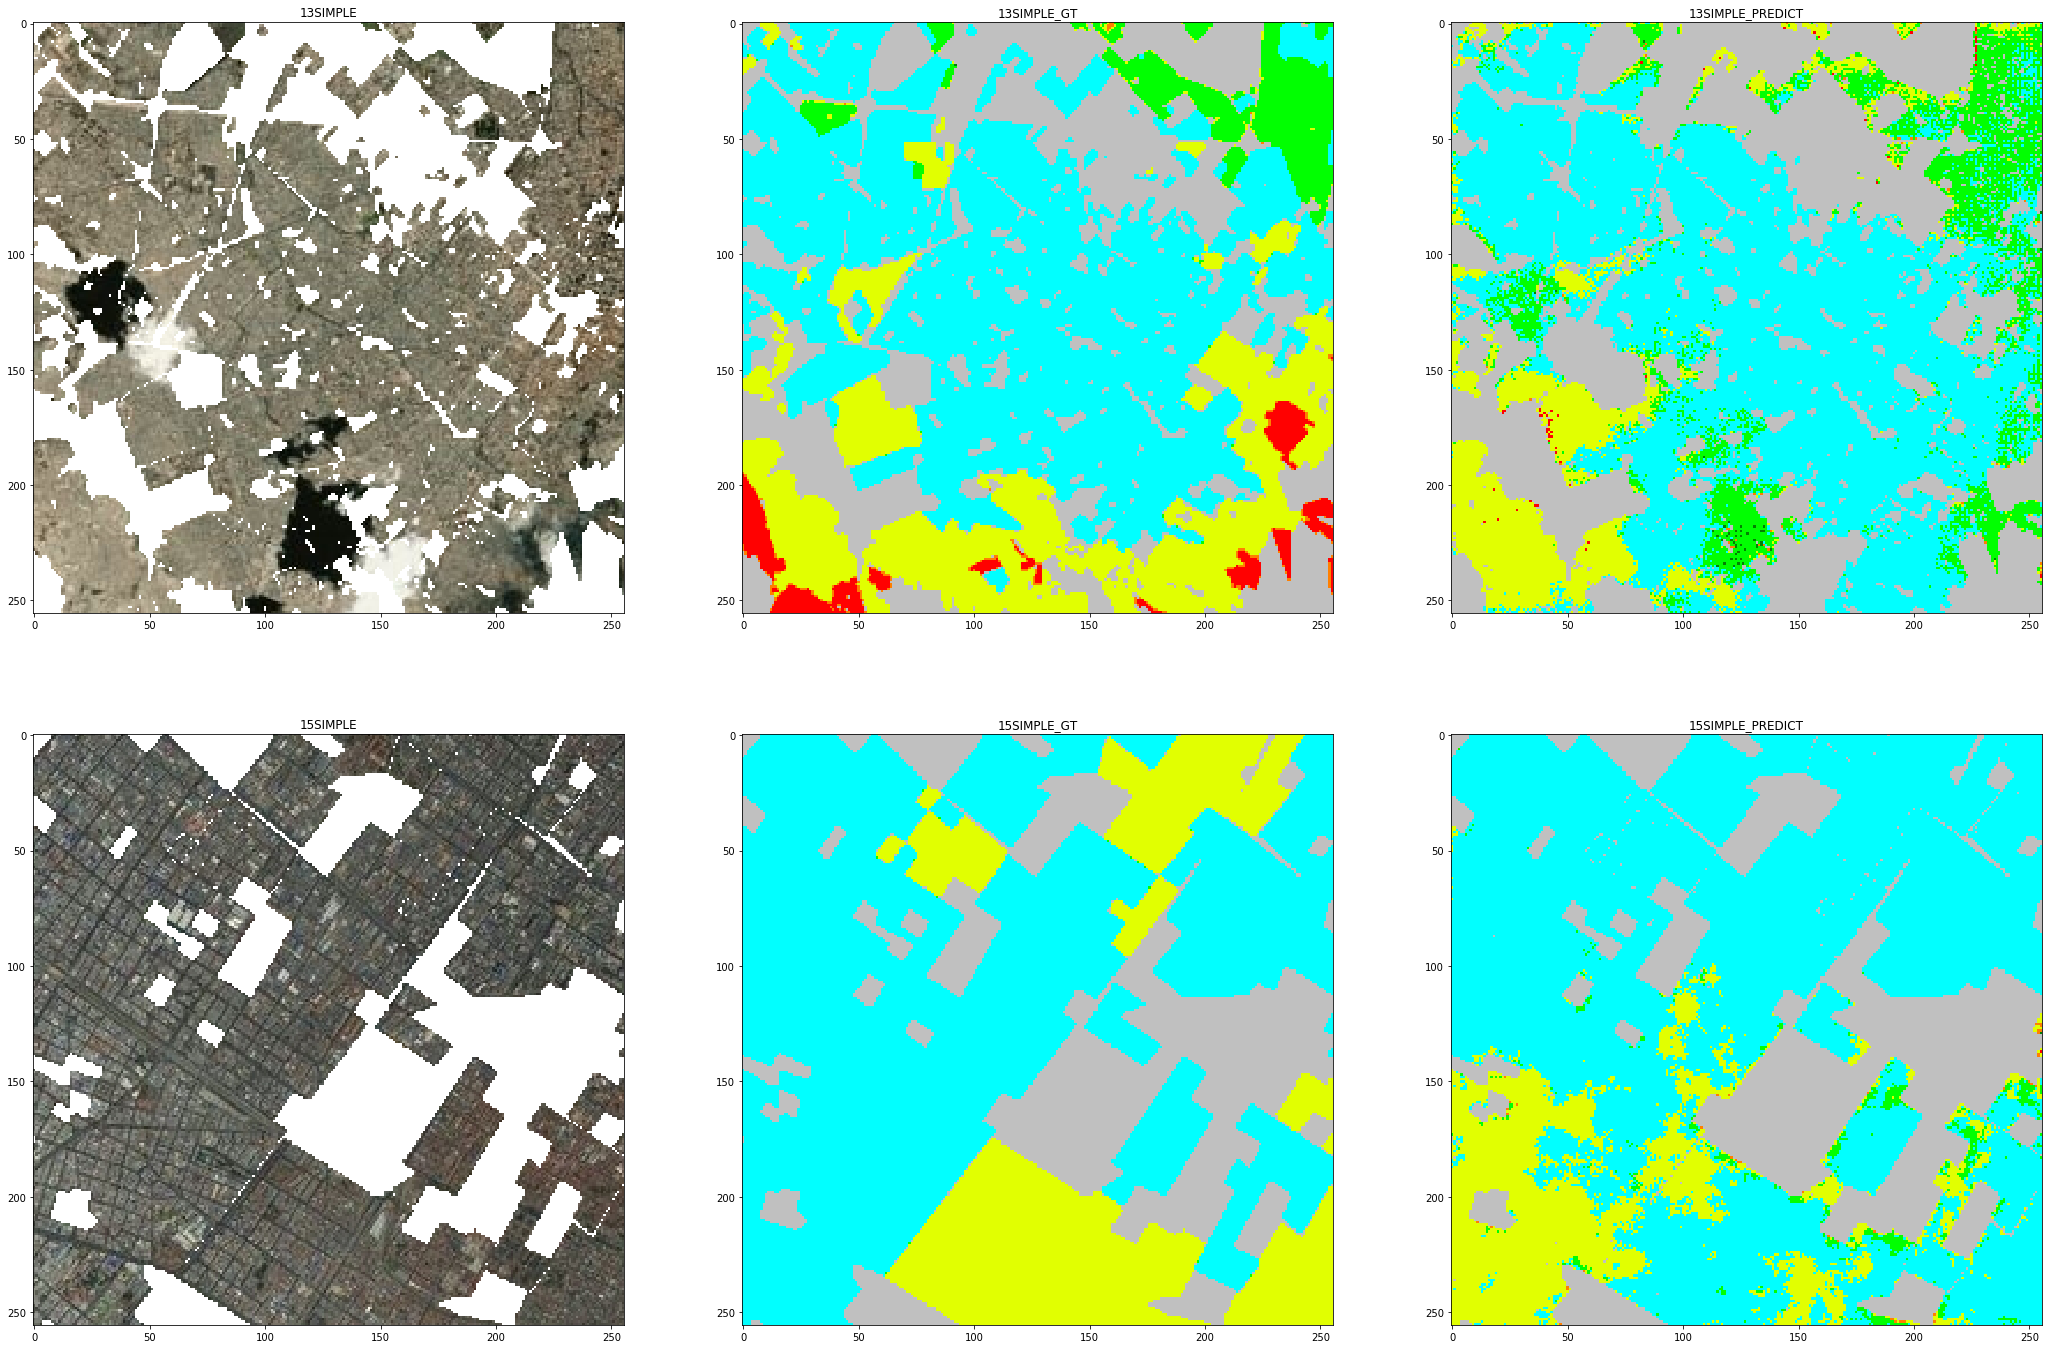

In [21]:
PRUEBA = 2
TYPE = "SIMPLE"

img = [0,12,33]
img_13_simple = io.imread(PATH_DATASET.replace("#","13")+"/"+TYPE+"/val/0.png")
img_13_simple_gt = io.imread(PATH_PRUEBAS+"/13_"+TYPE+"/prueba_"+str(PRUEBA)+"/Val/0_gt.png")
img_13_simple_pred = io.imread(PATH_PRUEBAS+"/13_"+TYPE+"/prueba_"+str(PRUEBA)+"/Val/0_pred.png")

img_15_simple = io.imread(PATH_DATASET.replace("#","15")+"/"+TYPE+"/val/33.png")
img_15_simple_gt = io.imread(PATH_PRUEBAS+"/15_"+TYPE+"/prueba_"+str(PRUEBA)+"/Val/33_gt.png")
img_15_simple_pred = io.imread(PATH_PRUEBAS+"/15_"+TYPE+"/prueba_"+str(PRUEBA)+"/Val/33_pred.png")

images = [img_13_simple, img_13_simple_gt, img_13_simple_pred,img_15_simple, img_15_simple_gt, img_15_simple_pred ]
titles = ["13"+TYPE, "13"+TYPE+"_GT", "13"+TYPE+"_PREDICT","15"+TYPE, "15"+TYPE+"_GT", "15"+TYPE+"_PREDICT"]
hp.show_images(images,titles=titles,cols=2)

## ¿Hay mejora en el IoU al hacer cambios de EPOCH?

In [32]:
mean_50 = go.Bar(
    x = ZOOMS,
    y = iou_all_test.sort_values(by=["MODEL","ZOOM","PRUEBA"])[24:36][iou_all_test.sort_values(by=["MODEL","ZOOM","PRUEBA"])[24:36]["EPOCH"] == 50].sort_index()["MEAN_IOU"].values.tolist(),
    name = "EPOCH: 50",
    marker = dict( color = "rgb(49,130,189)")
    )

mean_70 = go.Bar(
    x = ZOOMS,
    y = iou_all_test.sort_values(by=["MODEL","ZOOM","PRUEBA"])[24:36][iou_all_test.sort_values(by=["MODEL","ZOOM","PRUEBA"])[24:36]["EPOCH"] == 70].sort_index()["MEAN_IOU"].values.tolist(),
    name = "EPOCH: 70",
    marker = dict( color = "rgb(239,83,80)")
    )

data = [mean_50, mean_70]
layout = go.Layout(
    xaxis=dict(tickangle=0, title="FC-DenseNet56 - BATCH SIZE: 1"),
    yaxis = dict(title = "IOU"),
    barmode='group',
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='angled-text-bar')

Aunque realize pocas pruebas con distintos epoch las que hicen dicen que si hay cambios.

## PEOR MODELO

In [12]:
worst = iou_all_test.loc[iou_all_test["MEAN_IOU"].idxmin()].values[1:]
"El peor modelo es: - DATASET:{0} - MODELO: {1} - BATCh SIZE {2} - EPOCH: {3} -IOU: {4}".format(worst[0],worst[1],worst[2],worst[3],worst[4])

'El peor modelo es: - DATASET:13_SIMPLE - MODELO: MobileUNet - BATCh SIZE 1 - EPOCH: 70 -IOU: 0.07966989768315261'

In [14]:
grafica_bar(7)

In [14]:
ZOOM = "15_COMPOUND"

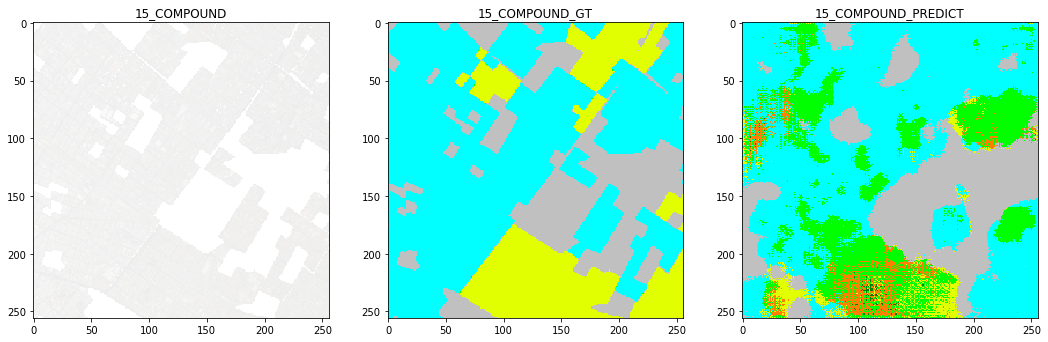

In [15]:
img = [0,12,33]
img_simple = io.imread(PATH_DATASET.replace("#",ZOOM[:2])+"/"+ZOOM[3:]+"/val/"+str(img[int(ZOOM[:2])-13])+".png")
img_simple_gt = io.imread(PATH_PRUEBAS+"/"+ZOOM+"/prueba_8/Val/"+str(img[int(ZOOM[:2])-13])+"_gt.png")
img_simple_pred = io.imread(PATH_PRUEBAS+"/"+ZOOM+"/prueba_8/Val/"+str(img[int(ZOOM[:2])-13])+"_pred.png")

images = [img_simple, img_simple_gt, img_simple_pred]
titles = [ZOOM, ZOOM+"_GT", ZOOM+"_PREDICT"]
hp.show_images(images,titles=titles,cols=1)

## MEJOR MODELO

In [14]:
best = iou_all_test.loc[iou_all_test["MEAN_IOU"].idxmax()].values[1:]
"El Mejor modelo es: - DATASET:{0} - MODELO: {1} - BATCh SIZE {2} - EPOCH: {3} -IOU: {4}".format(best[0],best[1],best[2],best[3],best[4])

'El Mejor modelo es: - DATASET:15_COMPOUND - MODELO: FC-DenseNet56 - BATCh SIZE 1 - EPOCH: 70 -IOU: 0.34783605595694456'

In [17]:
PRUEBA = 1
grafica_bar(PRUEBA)

In [18]:
ZOOM = "15_COMPOUND"

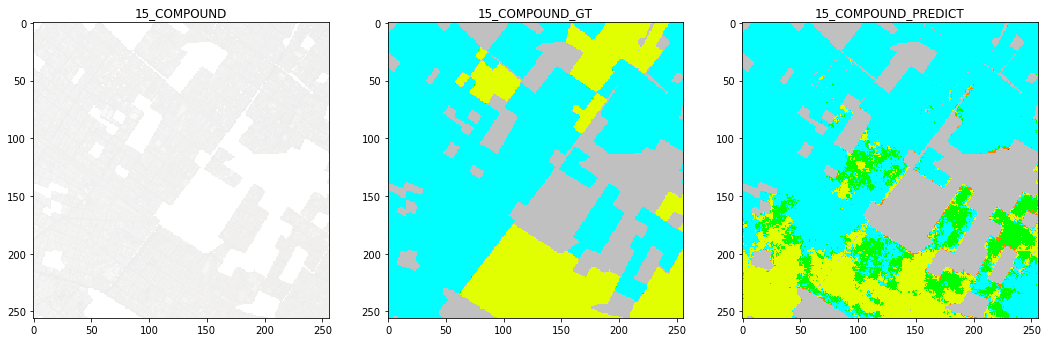

In [34]:
img = [0,12,33]
img_simple = io.imread(PATH_DATASET.replace("#",ZOOM[:2])+"/"+ZOOM[3:]+"/val/"+str(img[int(ZOOM[:2])-13])+".png")
img_simple_gt = io.imread(PATH_PRUEBAS+"/"+ZOOM+"/prueba_2/Val/"+str(img[int(ZOOM[:2])-13])+"_gt.png")
img_simple_pred = io.imread(PATH_PRUEBAS+"/"+ZOOM+"/prueba_2/Val/"+str(img[int(ZOOM[:2])-13])+"_pred.png")

images = [img_simple, img_simple_gt, img_simple_pred]
titles = [ZOOM, ZOOM+"_GT", ZOOM+"_PREDICT"]
hp.show_images(images,titles=titles,cols=1)

## IOU POR CLASE

In [15]:
iou_per_class = pd.read_csv(PATH_PRUEBAS+"/IoU class.csv")
iou_class_best_model = iou_per_class[iou_per_class["PRUEBA"] == 2]
iou_class_best_model

,ZOOM,PRUEBA,IOU_ESTRATO_1,IOU_ESTRATO_2,IOU_ESTRATO_3,IOU_ESTRATO_4,IOU_ESTRATO_5,IOU_ESTRATO_6,IOU_NO_DEFINIDO
1,13_SIMPLE,2,0.022246,0.310374,0.469174,0.113397,0.008644,0.000000,0.884053
12,13_COMPOUND,2,0.027222,0.285505,0.422454,0.029199,0.010874,0.000000,0.894016
23,14_SIMPLE,2,0.047336,0.145006,0.184981,0.003219,0.015237,0.003738,0.985150
34,14_COMPOUND,2,0.046079,0.161050,0.186309,0.029766,0.057944,0.007995,0.981997
45,15_SIMPLE,2,0.072913,0.160498,0.201209,0.044867,0.028865,0.012900,0.986731
56,15_COMPOUND,2,0.084816,0.131120,0.183344,0.056410,0.052739,0.013876,0.989259


In [22]:
iou_class_best_model.loc[1][2:].values

array([0.02224631405992489, 0.31037416164854065, 0.4691740770368301,
       0.11339701200097968, 0.00864402608588655, 0.0, 0.8840528459990619],
      dtype=object)

In [16]:
CLASS = ["ESTRATO 1","ESTRATO 2","ESTRATO 3","ESTRATO 4","ESTRATO 5","ESTRATO 6","NO DEFINIDO"]

In [26]:
iou_13_simple = go.Bar(
    x = CLASS,
    y = iou_class_best_model.loc[1][2:].values,
    name = "13_SIMPLE",
    marker = dict( color = "rgb(49,130,189)")
    )

iou_13_compound = go.Bar(
    x = CLASS,
    y = iou_class_best_model.loc[12][2:].values,
    name = "13_COMPOUND",
    marker = dict( color = "rgb(239,83,80)")
    )

iou_14_simple = go.Bar(
    x = CLASS,
    y = iou_class_best_model.loc[23][2:].values,
    name = "14_SIMPLE",
    marker = dict( color = "rgb(253,216,53)")
    )

iou_14_compound = go.Bar(
    x = CLASS,
    y = iou_class_best_model.loc[34][2:].values,
    name = "14_COMPOUND",
    marker = dict( color = "rgb(102,187,106)")
    )

iou_15_simple = go.Bar(
    x = CLASS,
    y = iou_class_best_model.loc[45][2:].values,
    name = "15_SIMPLE",
    marker = dict( color = "rgb(79,195,247)")
    )

iou_15_compound = go.Bar(
    x = CLASS,
    y = iou_class_best_model.loc[56][2:].values,
    name = "15_COMPOUND",
    marker = dict( color = "rgb(126,87,194)")
    )

data = [iou_13_simple,iou_13_compound, iou_14_simple, iou_14_compound, iou_15_simple, iou_15_compound]
layout = go.Layout(
    xaxis=dict(tickangle=0, title="FC-DenseNet56 - BATCH SIZE: 1"),
    yaxis = dict(title = "IOU"),
    barmode='group',
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='angled-text-bar')

## PORCENTAJE DE CADA CLASE EN EL DATASE

In [32]:
per_dataset = pd.read_csv(PATH_PRUEBAS+"/percentage on OVERLAECOBO.csv")
per_dataset[per_dataset["TYPE"] == "val"].mean()/100

PER_ESTRATO_1      0.061223
PER_ESTRATO_2      0.144790
PER_ESTRATO_3      0.193266
PER_ESTRATO_4      0.051771
PER_ESTRATO_5      0.028800
PER_ESTRATO_6      0.023021
PER_NO_DEFINIDO    0.497130
dtype: float64

## TIEMPO

In [8]:
group_13_simple = go.Bar(
    x = le,
    y = iou_all_test[iou_all_test["ZOOM"] == "13_SIMPLE"]["RUN_TIME"].values.tolist(),
    name = "13_SIMPLE",
    marker = dict( color = "rgb(49,130,189)")
)

group_13_compound = go.Bar(
    x = le,
    y = iou_all_test[iou_all_test["ZOOM"] == "13_COMPOUND"]["RUN_TIME"].values.tolist(),
    name = "13_COMPOUND",
    marker = dict( color = "rgb(239,83,80)")
)

group_14_simple = go.Bar(
    x = le,
    y = iou_all_test[iou_all_test["ZOOM"] == "14_SIMPLE"]["RUN_TIME"].values.tolist(),
    name = "14_SIMPLE",
    marker = dict( color = "rgb(253,216,53)")
)

group_14_compound = go.Bar(
    x = le,
    y = iou_all_test[iou_all_test["ZOOM"] == "14_COMPOUND"]["RUN_TIME"].values.tolist(),
    name = "14_COMPOUND",
    marker = dict( color = "rgb(102,187,106)")
)

group_15_simple = go.Bar(
    x = le,
    y = iou_all_test[iou_all_test["ZOOM"] == "15_SIMPLE"]["RUN_TIME"].values.tolist(),
    name = "15_SIMPLE",
    marker = dict( color = "rgb(79,195,247)")
)

group_15_compound = go.Bar(
    x = le,
    y = iou_all_test[iou_all_test["ZOOM"] == "15_COMPOUND"]["RUN_TIME"].values.tolist(),
    name = "15_COMPOUND",
    marker = dict( color = "rgb(126,87,194)")
)


data = [group_13_simple, group_13_compound,group_14_simple,group_14_compound, group_15_simple, group_15_compound ]
layout = go.Layout(
    xaxis=dict(tickangle=45),
    yaxis = dict(title = "TIEMPO (s)"),
    barmode='group',
    legend=dict( orientation="h", x = 0, y = 1.2)
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='angled-text-bar')